In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dem_df = pd.read_csv('../data/post_dem_candidates_with_tweet_topics.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])
rep_df = pd.read_csv('../data/post_rep_candidates_with_tweet_topics.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])
tweets_with_topics = pd.read_csv('../data/tweet_data/tweets_with_topics_post.csv', index_col=False)
sa_all_tweets = pd.read_csv('../data/tweet_data/sa_all_tweets_post.csv', index_col=False)
sa_tweets_raw = pd.read_csv('../data/tweet_data/test_results.tsv', sep='\t', names = ["neg_prob", "neutral_prob", "pos_prob"])
sa_all_tweets['neg_prob'] = sa_tweets_raw.neg_prob
sa_all_tweets['neutral_prob'] = sa_tweets_raw.neutral_prob
sa_all_tweets['pos_prob'] = sa_tweets_raw.pos_prob

all_tweets_cleaned = pd.read_csv('../data/tweet_data/all_tweets_cleaned.csv', index_col=False)




In [7]:
# sa_all_tweets.loc[sa_all_tweets['pos_prob'] >= 0.9, 'sentiment'] = 4
# sa_all_tweets.to_csv('../data/tweet_data/sa_all_tweets_post.csv', index=False)

In [161]:
sa_all_tweets['neutral_prob'].max()

0.0012331718

In [174]:
for t in sa_all_tweets[(sa_all_tweets['neg_prob'] >= 0.65) & (sa_all_tweets['neg_prob'] < 0.7)].sample(100).stripped_text:
    print(t, '\n')
    

Bc despite being a good fundraiser, he had to spend down to compete in the primary, while Hogan comfortably sat on a $10M warchest & RGA hammered w attack ads. Its money. If hes fundraising hes not with average voters, exactly the position Hogan wants him in. To help, donate. 

4/ Gold Star Wives (even calling them his ladies"), but hasn't even sponsored a bill that would help them to do something as simple as buy groceries or have access to healthcare in a timely fashion. Words can be cheap. When you haven't put action behind those words to prove.." 

Nuestros hombres y mujeres en las fuerzas armadas arriesgan sus vidas todos los das para defender nuestras libertades. Debemos estar con ellos y sus familias mientras estn en el extranjero, y an ms cuando regresen a casa. #NVGov  

Its time for sensible gun policy in America.  

Our Critical Fundraising Deadline Is In 8 Days, And We Have 800,000 People To Reach Over T  #MAGA #TrumpTrain #idpol 

But men were still executed & for that pat

In [74]:
dem_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'partisan_lean', 'primary_pctg', 'won_primary', 'race', 'veteran',
       'lgbtq', 'elected_official', 'self_funder', 'stem', 'obama_alum',
       'dem_party_support', 'emily_endorsed', 'gun_sense_candidate',
       'biden_endorsed', 'warren_endorsed', 'sanders_endorsed',
       'our_revolution_endorsed', 'justice_dems_endorsed', 'pccc_endorsed',
       'indivisible_endorsed', 'wfp_endorsed', 'votevets_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet

In [73]:
election_context = pd.read_csv('../data/election-context-2018.csv')
print(election_context.columns)
election_context.head(5)

Index(['state', 'county', 'fips', 'trump16', 'clinton16', 'otherpres16',
       'romney12', 'obama12', 'otherpres12', 'demsen16', 'repsen16',
       'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16', 'demgov16',
       'repgov16', 'othergov16', 'repgov14', 'demgov14', 'othergov14',
       'total_population', 'cvap', 'white_pct', 'black_pct', 'hispanic_pct',
       'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'ruralurban_cc'],
      dtype='object')


,state,county,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demsen16,...,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc
0,Alabama,Autauga,1001,18172,5936,865,17379,6363,190,6331.0,...,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0
1,Alabama,Baldwin,1003,72883,18458,3874,66016,18424,898,19145.0,...,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0
2,Alabama,Barbour,1005,5454,4871,144,5550,5912,47,4777.0,...,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0
3,Alabama,Bibb,1007,6738,1874,207,6132,2202,86,2082.0,...,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0
4,Alabama,Blount,1009,22859,2156,573,20757,2970,279,2980.0,...,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0


In [52]:
# tweet ids of candidates who won
candidate_winners = dem_df[dem_df['won_primary'] == 'Yes'].twitter_handle.append(rep_df[rep_df['won_primary'] == 'Yes'].twitter_handle)
candidate_winners.append(dem_df[dem_df['won_primary'] == 'Yes'].twitter_handle2)
candidate_winners.append(rep_df[rep_df['won_primary'] == 'Yes'].twitter_handle2)

tweet_id_winners = tweets_with_topics[tweets_with_topics['twitter_handle'].isin(set(candidate_winners))].tweet_id.unique()
# tweet_id_winners


array([  1094,   1095,   1096, ..., 557315, 557316, 557317])

In [3]:
sa_all_tweets.head(3)

,tweet_id,stripped_text,twitter_handle,sentiment
0,0,With corruption being one of the biggest conce...,CA_Countryman,0
1,1,With corruption being one of the biggest conce...,CA_Countryman,0
2,2,Here is an important notice concerning Christo...,CA_Countryman,2


In [163]:
tweets_with_topics = tweets_with_topics.rename(index=str, columns={"tweet_idx": "tweet_id"})
tweets_topic_sa = tweets_with_topics.merge(sa_all_tweets[['tweet_id', 'sentiment', 'neg_prob', 'neutral_prob', 'pos_prob']], on=['tweet_id'], how='left')


In [149]:
print(len(tweets_topic_sa[tweets_topic_sa['sentiment'].isna()]))
print(len(tweets_topic_sa))
print(len(tweets_with_topics))
print(len(sa_all_tweets))

0
557549
557549
609527


In [104]:
print(len(all_tweets_cleaned))
print(len(tweets_with_topics))

557549
557549


In [10]:
dem_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'partisan_lean', 'primary_pctg', 'won_primary', 'race', 'veteran',
       'lgbtq', 'elected_official', 'self_funder', 'stem', 'obama_alum',
       'dem_party_support', 'emily_endorsed', 'gun_sense_candidate',
       'biden_endorsed', 'warren_endorsed', 'sanders_endorsed',
       'our_revolution_endorsed', 'justice_dems_endorsed', 'pccc_endorsed',
       'indivisible_endorsed', 'wfp_endorsed', 'votevets_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet

In [11]:
# # Add 'party' column to tweets with topics

# tweets_with_topics = tweets_with_topics.merge(all_tweets_cleaned[['tweet_idx', 'twitter_handle']], how='left', on=['tweet_idx'])
                                                                                         
# dem_candidates = dem_df.twitter_handle.unique()
# dem_candidates2 = dem_df.twitter_handle2.unique()

# party = []
# for i, r in tweets_with_topics.iterrows():
#     if i % 20000 == 0:
#         print('{} / {}'.format(i, len(tweets_with_topics)))
#     if r['twitter_handle'] in dem_candidates or r['twitter_handle'] in dem_candidates2:
#         party.append(0)
#     else:
#         party.append(1)
# tweets_with_topics['party'] = party

# tweets_with_topics.to_csv('../data/tweet_data/tweets_with_topics_post.csv', index=False)


In [12]:
topics = ['gun_control', 'health_care',
       'abortion', 'immigration', 'education', 'jobs'
          , 'environment','women', 'lgbt', 'freedom', 'trump']
topic_cols = ['{}_tweet_count'.format(t) for t in topics]

In [13]:
print("dem candidates w/ no classified topics: ", len(dem_df[(dem_df['gun_control_tweet_count'] == 0) & 
          (dem_df['health_care_tweet_count'] == 0) &
          (dem_df['abortion_tweet_count'] == 0) &
          (dem_df['immigration_tweet_count'] == 0) &
          (dem_df['education_tweet_count'] == 0) &
          (dem_df['jobs_tweet_count'] == 0) &
          (dem_df['environment_tweet_count'] == 0) &
          (dem_df['women_tweet_count'] == 0) &
          (dem_df['lgbt_tweet_count'] == 0) &
          (dem_df['freedom_tweet_count'] == 0) & (dem_df['trump_tweet_count'] == 0)]) / len(dem_df))

print("rep candidates w/ no classified topics: ", len(rep_df[(rep_df['gun_control_tweet_count'] == 0) & 
          (rep_df['health_care_tweet_count'] == 0) &
          (rep_df['abortion_tweet_count'] == 0) &
          (rep_df['immigration_tweet_count'] == 0) &
          (rep_df['education_tweet_count'] == 0) &
          (rep_df['jobs_tweet_count'] == 0) &
          (rep_df['environment_tweet_count'] == 0) &
          (rep_df['women_tweet_count'] == 0) &
          (rep_df['lgbt_tweet_count'] == 0) &
          (rep_df['freedom_tweet_count'] == 0) & (rep_df['trump_tweet_count'] == 0)]) / len(rep_df))

dem candidates w/ no classified topics:  0.22685788787483702
rep candidates w/ no classified topics:  0.4287769784172662


In [14]:
def get_topic_df(candidate_df, party):
    max_count_col = []
    median_count_col = []
    avg_count_col = []
    total_classified_col = []
    
    for t in topics:
        topic_count = len(tweets_with_topics[(tweets_with_topics[t] == 1) & (tweets_with_topics['party'] == party)])
        max_count = candidate_df["{}_tweet_count".format(t)].max()
        avg_count = candidate_df["{}_tweet_count".format(t)].mean()
        max_count_col.append(max_count)
        avg_count_col.append(round(avg_count, 2))
        total_classified_col.append(topic_count)
    df = pd.DataFrame(np.transpose([topics,avg_count_col, max_count_col, total_classified_col])
             , columns=['topic', 'avg_count', 'max_count', 'total_classified'])
    df['max_count'] = df['max_count'].astype('int32')
    df['total_classified'] = df['total_classified'].astype('int32')
    return df
    
dem_topic_df = get_topic_df(dem_df, 0)
rep_topic_df = get_topic_df(rep_df, 1)

In [15]:
print("total tweets: ",len(tweets_with_topics[tweets_with_topics['party'] == 0]))
dem_topic_df.sort_values(by=['total_classified'], ascending=False).reset_index(drop=True)

total tweets:  381881


,topic,avg_count,max_count,total_classified
0,trump,28.24,554,21582
1,health_care,23.49,343,17831
2,gun_control,15.01,352,11455
3,jobs,13.25,157,10071
4,education,9.55,192,7292
5,environment,7.65,1026,5855
6,immigration,7.04,192,5379
7,lgbt,2.39,64,1826
8,freedom,2.16,55,1651
9,women,2.03,59,1548


In [16]:
print("total tweets: ", len(tweets_with_topics[tweets_with_topics['party'] == 1]))
rep_topic_df.sort_values(by=['total_classified'], ascending=False).reset_index(drop=True)

total tweets:  175668


,topic,avg_count,max_count,total_classified
0,trump,19.53,1015,13818
1,immigration,6.15,324,4339
2,jobs,5.74,200,4124
3,gun_control,4.23,254,3086
4,health_care,3.77,473,2956
5,freedom,3.48,276,2418
6,education,2.47,83,1738
7,abortion,1.96,75,1405
8,environment,0.56,33,435
9,women,0.21,10,157


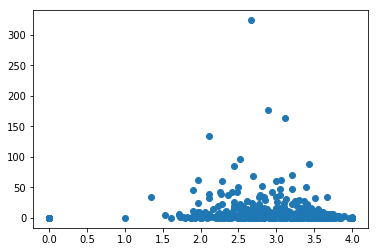

In [150]:
fig, axs = plt.subplots(1)
axs.scatter(rep_df['sentiment'], rep_df['immigration_tweet_count'])

In [151]:
tweets_with_topics.columns

Index(['tweet_id', 'stripped_text', 'party', 'gun_control', 'health_care',
       'abortion', 'immigration', 'kavanaugh', 'education', 'jobs', 'tax',
       'fake_news', 'environment', 'sexual_assault', 'gender', 'women', 'lgbt',
       'freedom', 'trump', 'twitter_handle'],
      dtype='object')

(array([ 844.,    0., 1478.,    0., 2017.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

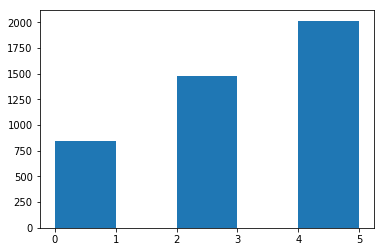

In [164]:
fig, axs = plt.subplots(1)
rep = tweets_topic_sa[(tweets_topic_sa['immigration'] == 1) & tweets_topic_sa['party'] == 1].sentiment
axs.hist(rep, bins=[0, 1, 2, 3, 4, 5])

In [153]:
tweets_topic_sa.head(3)

,tweet_id,stripped_text,party,gun_control,health_care,abortion,immigration,kavanaugh,education,jobs,...,gender,women,lgbt,freedom,trump,twitter_handle,sentiment,neg_prob,neutral_prob,pos_prob
0,0,with corruption being one of the biggest conce...,0,False,0,0,0,0,0,0,...,False,False,0,0,0,CA_Countryman,0,0.719503,6.849774e-08,0.280497
1,1,with corruption being one of the biggest conce...,0,False,0,0,0,0,0,0,...,False,False,0,0,0,CA_Countryman,0,0.761665,4.084816e-08,0.238335
2,2,here is an important notice concerning christo...,0,False,0,0,0,0,0,0,...,False,False,0,0,0,CA_Countryman,2,0.684472,4.112755e-07,0.315528


### Sentiment Ratios

In [165]:
print(len(tweet_id_winners))
print(len(rep_winners))
print(len(tweets_topic_sa[tweets_topic_sa['tweet_id'].isin(set(tweet_id_winners))]))
print(tweet_id_winners)

205363
60657
205363
[  1094   1095   1096 ... 557315 557316 557317]


num rep tweets:  175668
60657
num dem tweets:  381881


(-1.127686682723835,
 1.1075149597370406,
 -1.1296921940855285,
 1.1014139140040728)

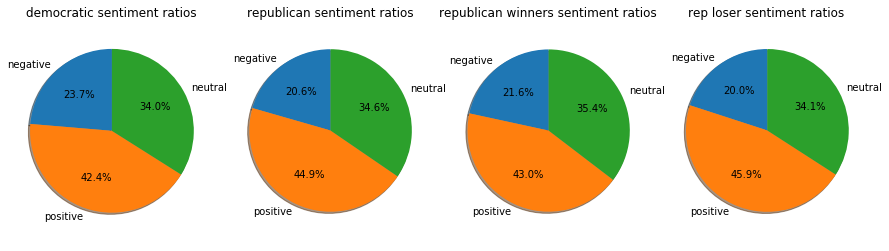

In [166]:
# All Candidates
rep = tweets_topic_sa[tweets_topic_sa['party'] == 1]
dem = tweets_topic_sa[tweets_topic_sa['party'] == 0]
rep_winners = tweets_topic_sa[(tweets_topic_sa['party'] == 1) & (tweets_topic_sa['tweet_id'].isin(tweet_id_winners))]
dem_winners = tweets_topic_sa[(tweets_topic_sa['party'] == 0) & (tweets_topic_sa['tweet_id'].isin(tweet_id_winners))]
rep_losers = tweets_topic_sa[(tweets_topic_sa['party'] == 1) & (~tweets_topic_sa['tweet_id'].isin(tweet_id_winners))]

print("num rep tweets: ", len(rep))
print(len(rep_winners))
print("num dem tweets: ", len(dem))

dem_nums = [len(dem[dem['sentiment'] == 0]), len(dem[dem['sentiment'] == 4]), len(dem[dem['sentiment'] == 2])]
rep_nums = [len(rep[rep['sentiment'] == 0]), len(rep[rep['sentiment'] == 4]), len(rep[rep['sentiment'] == 2])]
rep_winners_nums = [len(rep_winners[rep_winners['sentiment'] == 0]), len(rep_winners[rep_winners['sentiment'] == 4]), len(rep_winners[rep_winners['sentiment'] == 2])]
rep_losers_nums = [len(rep_losers[rep_losers['sentiment'] == 0]), len(rep_losers[rep_losers['sentiment'] == 4]), len(rep_losers[rep_losers['sentiment'] == 2])]


labels = ['negative', 'positive', 'neutral']
f, axs = plt.subplots(1,4,figsize=(15,4))
axs[0].pie(dem_nums, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title("democratic sentiment ratios")
axs[0].axis('equal')
axs[1].pie(rep_nums, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title("republican sentiment ratios")
axs[1].axis('equal')

axs[2].pie(rep_winners_nums, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[2].set_title("republican winners sentiment ratios")
axs[2].axis('equal')

axs[3].pie(rep_losers_nums, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[3].set_title("rep loser sentiment ratios")
axs[3].axis('equal')



In [167]:
def print_sentiment_breakdown(tweets_topic_sa, topic):
    print("== democratic ratios == ")
    rep = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 1]
    dem = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 0]
    print("negative sentiment: ", len(dem[dem['sentiment'] == 0]) / len(dem))
    print("positive sentiment: ", len(dem[dem['sentiment'] == 4]) / len(dem))
    print("neutral sentiment: ", len(dem[dem['sentiment'] == 2]) / len(dem))

    print("\n== republican ratios == ")
    print("negative sentiment: ", len(rep[rep['sentiment'] == 0]) / len(rep))
    print("positive sentiment: ", len(rep[rep['sentiment'] == 4]) / len(rep))
    print("neutral sentiment: ", len(rep[rep['sentiment'] == 2]) / len(rep))

def plot_topic(topic):
    print(topic)
    f, axs = plt.subplots(1,2,figsize=(15,4))
    rep = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 1]
    dem = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 0]

    axs[0].hist(dem.sentiment, color='blue', bins=[0, 1, 2, 3, 4, 5])
    axs[0].set_title("democratic - {}".format(topic))
    axs[1].hist(rep.sentiment, color='red', bins=[0, 1, 2, 3, 4, 5])
    axs[1].set_title("republican - {}".format(topic))
    print_sentiment_breakdown(tweets_topic_sa, topic)
    return dem, rep

In [168]:
print(len(tweets_topic_sa[(tweets_topic_sa['health_care'] == 1) & (tweets_topic_sa['party'] == 0) & (tweets_topic_sa['sentiment'] == 0)]))

print(len(tweets_topic_sa[(tweets_topic_sa['health_care'] == 1) & (tweets_topic_sa['party'] == 0)]))
print(4158 /17831)

4158
17831
0.23318938926588526


trump
== democratic ratios == 
negative sentiment:  0.22736426652149686
positive sentiment:  0.43096126577296495
neutral sentiment:  0.3416744677055382

== republican ratios == 
negative sentiment:  0.2063974525980605
positive sentiment:  0.45918367346938777
neutral sentiment:  0.33441887393255176
this move would allow a federal prosecutor in colorado, appointed by the trump administration, to essentially recreate a black market if they want to, and put resources into fighting something that: - doesn't kill - is prescribed as medicine - is a major revenue source 

fy19 #ndaa is coming up & my advise to him was to not give trump anymore money for war. earmark that money for veterans & their families. war destabilizes nations & causes more #violence, more #poverty, #climatecrisis, #massmigration & more ecological devastation. 

more people are realizing @realdonaldtrump is a conman who doesn't care about working americans:  bad news for himand for @repmimiwalters who votes with him 98.3%

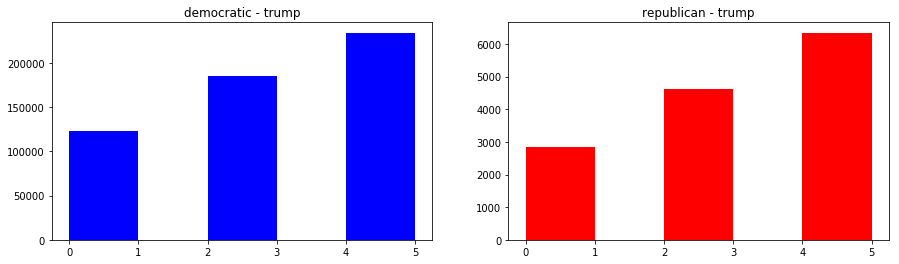

In [170]:
topic = 'trump'

dem, rep = plot_topic('trump')
# print_sentiment_breakdown(dem, rep)
# topic = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 0]


In [ ]:
dem_trump = tweets_topic_sa[(tweets_topic_sa['trump'] == 1) & tweets_topic_sa['party'] == 0]
rep_trump = tweets_topic_sa[(tweets_topic_sa['trump'] == 1) & tweets_topic_sa['party'] == 1]


# Health Care

health_care
== democratic ratios == 
negative sentiment:  0.22691595458291036
positive sentiment:  0.431621026590671
neutral sentiment:  0.34146301882641866

== republican ratios == 
negative sentiment:  0.21346414073071718
positive sentiment:  0.439106901217862
neutral sentiment:  0.3474289580514208
were paging all our favorite healthcare providers in #nc07! please join us for a friend-raiser on 9/5. we need your support to put a #doctorinthehouse wholl be #oncallforyou for a change! get your ticket today:  

6. it's the reason the republicans want to cut funding for children's health care  

thank you @local4news for sharing our message with voters. we need to restore the middle class in this country, and we can do that by fighting for good jobs that pay well, for quality public education, and affordable health care for all.  

yes! @julianaforlg there is a pathway to fully funding mental health healthcare in il, & bringing trauma informed practices to all communities we need this no

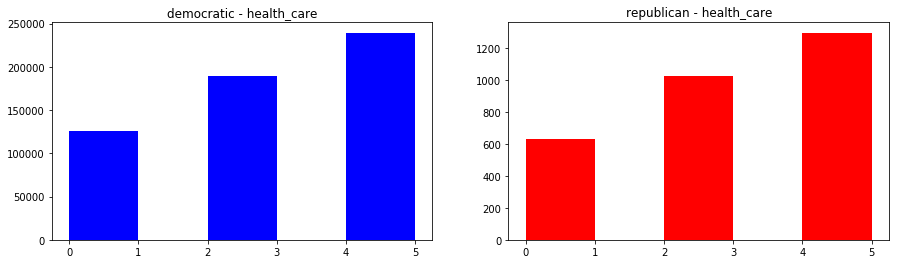

In [184]:
topic = 'health_care'

df, df1 = plot_topic('health_care')
# for t in tweets_topic_sa[(tweets_topic_sa['health_care'] == 1) & (tweets_topic_sa['party'] == 0)].sample(10).stripped_text:
#     print(t, '\n')
# print_sentiment_breakdown(df, df1)

In [248]:
dem_win_df.columns

Index(['tweet_id', 'stripped_text', 'party', 'gun_control', 'health_care',
       'abortion', 'immigration', 'kavanaugh', 'education', 'jobs', 'tax',
       'fake_news', 'environment', 'sexual_assault', 'gender', 'women', 'lgbt',
       'freedom', 'trump', 'twitter_handle', 'sentiment', 'neg_prob',
       'neutral_prob', 'pos_prob'],
      dtype='object')

num rep winner tweets on health care:  1105
182
391
num rep loser tweets on health care:  1505
num dem winner tweets on health care:  9335
223
488
num dem loser tweets on health care:  8467
num dem winners tweets on health care:  9335


'\n--> republican: even though there are more losers(391) than winners (182), \n      - # tweets from losers and # tweets from winners were pretty similar (only 400 tweets more from losers)\n      - those who tweeted more about health care lost\n\n--> dem: even though there are more losers (488) than winners (222),\n      - those who won tweeted wayyy more about health care than those who lost ()\n'

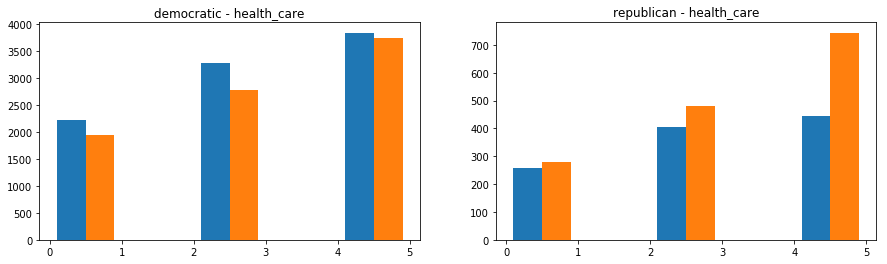

In [258]:
f, axs = plt.subplots(1,2,figsize=(15,4))
topic = 'health_care'
dem_winners = set(dem_df[dem_df['won_primary'] == 'Yes'].twitter_handle.append(dem_df[dem_df['won_primary'] == 'Yes'].twitter_handle2))
dem_losers = set(dem_df[dem_df['won_primary'] == 'No'].twitter_handle.append(dem_df[dem_df['won_primary'] == 'No'].twitter_handle2))

rep_winners = set(rep_df[rep_df['won_primary'] == 'Yes'].twitter_handle.append(rep_df[rep_df['won_primary'] == 'Yes'].twitter_handle2))
rep_losers = set(rep_df[rep_df['won_primary'] == 'No'].twitter_handle.append(rep_df[rep_df['won_primary'] == 'No'].twitter_handle2))

rep_win_df = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & (tweets_topic_sa['party'] == 1) & (tweets_topic_sa['twitter_handle'].isin(rep_winners))]
rep_lose_df = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & (tweets_topic_sa['party'] == 1) & (tweets_topic_sa['twitter_handle'].isin(rep_losers))]

dem_win_df = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & (tweets_topic_sa['party'] == 0) & (tweets_topic_sa['twitter_handle'].isin(dem_winners))]
dem_lose_df = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & (tweets_topic_sa['party'] == 0)& (tweets_topic_sa['twitter_handle'].isin(dem_losers))]


axs[0].hist([dem_win_df.sentiment, dem_lose_df.sentiment], bins=[0, 1, 2, 3, 4, 5])
axs[0].set_title("democratic - {}".format(topic))
axs[1].hist([rep_win_df.sentiment, rep_lose_df.sentiment], bins=[0, 1, 2, 3, 4, 5])
axs[1].set_title("republican - {}".format(topic))

print("num rep winner tweets on health care: ", len(rep_win_df))
print(len(rep_winners))
print(len(rep_losers))
print("num rep loser tweets on health care: ", len(rep_lose_df))

print("num dem winner tweets on health care: ", len(dem_win_df))
print(len(dem_winners))
print(len(dem_losers))
print("num dem loser tweets on health care: ", len(dem_lose_df))
print("num dem winners tweets on health care: ", len(dem_win_df))

"""
--> republican: even though there are more losers(391) than winners (182), 
      - # tweets from losers and # tweets from winners were pretty similar (only 400 tweets more from losers)
      - those who tweeted more about health care lost

--> dem: even though there are more losers (488) than winners (222),
      - those who won tweeted wayyy more about health care than those who lost (900 more)
"""


In [198]:
# fig, axs = plt.subplots(1, 2, figsize=(15,4))
# axs[0].scatter(dem_df['sentiment'], dem_df['health_care_tweet_count'])
# axs[1].scatter(rep_df['sentiment'], rep_df['health_care_tweet_count'], color='red')
rep_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'primary_pctg', 'won_primary', 'rep_party_support', 'trump_endorsed',
       'bannon_endorsed', 'great_america_endorsed', 'nra_endorsed',
       'right_to_life_endorsed', 'susan_b_anthony_endorsed',
       'club_for_growth_endorsed', 'koch_support', 'house_freedom_support',
       'tea_party_endorsed', 'main_street_endorsed', 'chamber_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet_count', 'gender_tweet_count', 'women_tweet_count',
       'lgbt_twee

# Immigration

immigration
== democratic ratios == 
negative sentiment:  0.22709820863686483
positive sentiment:  0.4314003723721552
neutral sentiment:  0.3415014189909799

== republican ratios == 
negative sentiment:  0.1945148651763079
positive sentiment:  0.4648536529154183
neutral sentiment:  0.3406314819082738


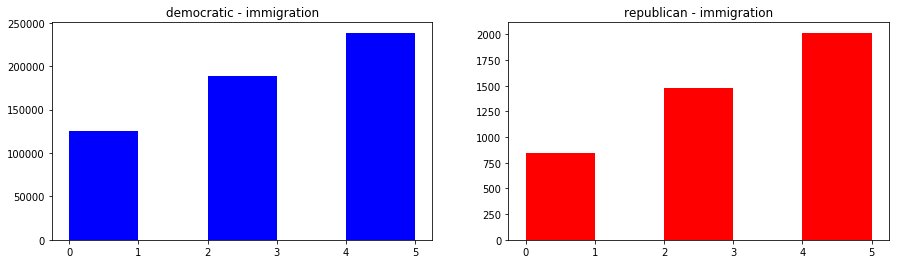

In [200]:
topic = 'immigration'
dem, rep = plot_topic(topic)

# LGBT

lgbt
== democratic ratios == 
negative sentiment:  0.22684784071034575
positive sentiment:  0.43167137539799993
neutral sentiment:  0.3414807838916543

== republican ratios == 
negative sentiment:  0.20270270270270271
positive sentiment:  0.35135135135135137
neutral sentiment:  0.44594594594594594


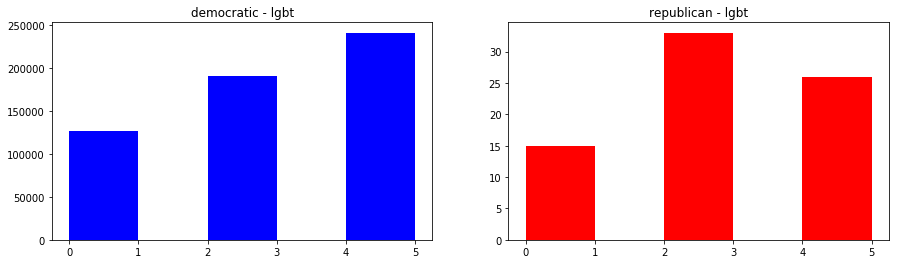

In [177]:
topic = 'lgbt'
dem, rep = plot_topic(topic)

In [183]:
# f, axs = plt.subplots(1)
# rep = tweets_topic_sa[(tweets_topic_sa['lgbt'] == 1) & tweets_topic_sa['party'] == 1]
# dem = tweets_topic_sa[(tweets_topic_sa['lgbt'] == 1) & tweets_topic_sa['party'] == 0]

# axs.hist([rep.sentiment, dem.sentiment])

# # [0].hist(dem.sentiment, color='blue', bins=[0, 1, 2, 3, 4, 5])
# # axs[0].set_title("democratic - {}".format(topic))
# # axs[1].hist(rep.sentiment, color='red', bins=[0, 1, 2, 3, 4, 5])
# # axs[1].set_title("republican - {}".format(topic))
# # print_sentiment_breakdown(tweets_topic_sa, topic)

# Education

education
== democratic ratios == 
negative sentiment:  0.2268540924882739
positive sentiment:  0.431761875889466
neutral sentiment:  0.3413840316222601

== republican ratios == 
negative sentiment:  0.2238204833141542
positive sentiment:  0.3993095512082854
neutral sentiment:  0.3768699654775604


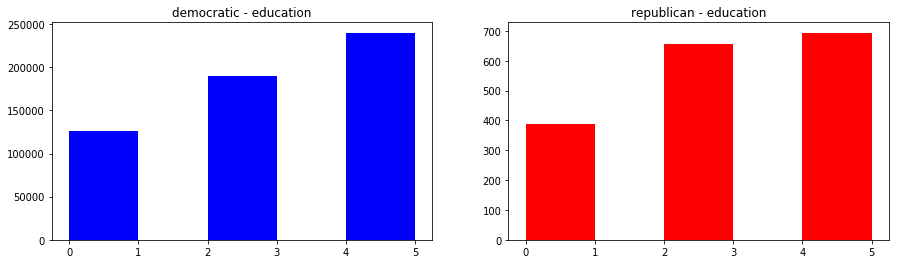

In [178]:
topic = 'education'
dem, rep = plot_topic(topic)

# Abortion

abortion
== democratic ratios == 
negative sentiment:  0.226928637187491
positive sentiment:  0.431550102131822
neutral sentiment:  0.341521260680687

== republican ratios == 
negative sentiment:  0.19359430604982206
positive sentiment:  0.47544483985765124
neutral sentiment:  0.3309608540925267


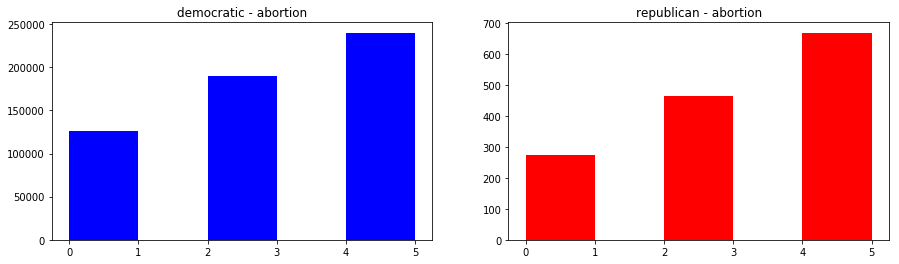

In [201]:
topic = 'abortion'
dem, rep = plot_topic(topic)

# Jobs

jobs
== democratic ratios == 
negative sentiment:  0.22693047838460495
positive sentiment:  0.4315652527442743
neutral sentiment:  0.34150426887112073

== republican ratios == 
negative sentiment:  0.21532492725509214
positive sentiment:  0.4444713870029098
neutral sentiment:  0.34020368574199805


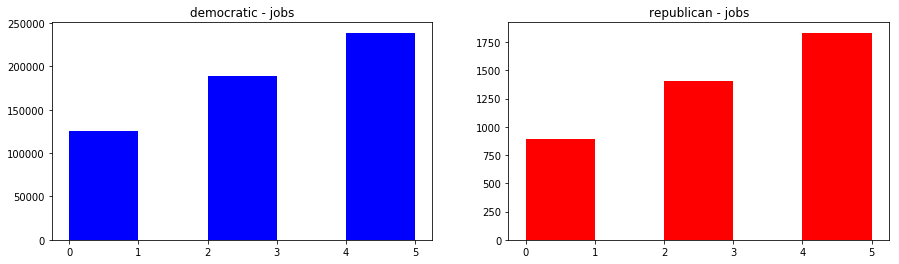

In [202]:
topic = 'jobs'
dem, rep = plot_topic(topic)

# Gun Control

gun_control
== democratic ratios == 
negative sentiment:  0.22698538946692565
positive sentiment:  0.43154908442943896
neutral sentiment:  0.3414655261036354

== republican ratios == 
negative sentiment:  0.2015554115359689
positive sentiment:  0.45171743357096567
neutral sentiment:  0.34672715489306544


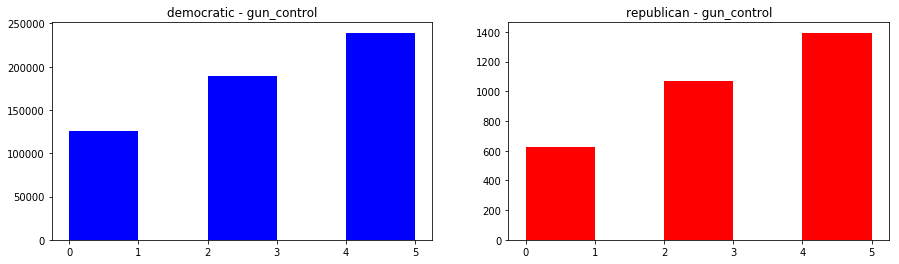

In [203]:
topic = 'gun_control'
dem, rep = plot_topic(topic)

In [204]:
rep_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'primary_pctg', 'won_primary', 'rep_party_support', 'trump_endorsed',
       'bannon_endorsed', 'great_america_endorsed', 'nra_endorsed',
       'right_to_life_endorsed', 'susan_b_anthony_endorsed',
       'club_for_growth_endorsed', 'koch_support', 'house_freedom_support',
       'tea_party_endorsed', 'main_street_endorsed', 'chamber_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet_count', 'gender_tweet_count', 'women_tweet_count',
       'lgbt_twee

== democratic ratios == 
negative sentiment:  0.22698538946692565
positive sentiment:  0.43154908442943896
neutral sentiment:  0.3414655261036354

== republican ratios == 
negative sentiment:  0.2015554115359689
positive sentiment:  0.45171743357096567
neutral sentiment:  0.34672715489306544


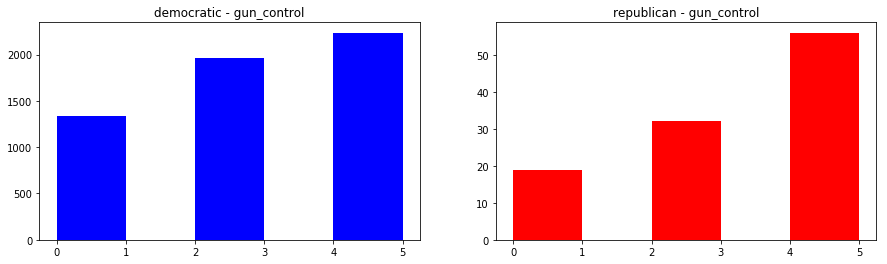

In [210]:
topic = 'gun_control'
# dem, rep = plot_topic(topic)
nra_endorsed = rep_df[rep_df['nra_endorsed'] == 'Yes'].twitter_handle.append(rep_df[rep_df['nra_endorsed'] == 'Yes'].twitter_handle2)
gun_sense = dem_df[dem_df['gun_sense_candidate'] == 'Yes'].twitter_handle.append( dem_df[dem_df['gun_sense_candidate'] == 'Yes'].twitter_handle2)


f, axs = plt.subplots(1,2,figsize=(15,4))
rep = tweets_topic_sa[(tweets_topic_sa['gun_control'] == 1) 
                      & (tweets_topic_sa['party'] == 1) & (tweets_topic_sa['twitter_handle'].isin(nra_endorsed))]
dem = tweets_topic_sa[(tweets_topic_sa['gun_control'] == 1) & (tweets_topic_sa['party'] == 0) & (tweets_topic_sa['twitter_handle'].isin(gun_sense))]

axs[0].hist(dem.sentiment, color='blue', bins=[0, 1, 2, 3, 4, 5])
axs[0].set_title("democratic - {}".format(topic))
axs[1].hist(rep.sentiment, color='red', bins=[0, 1, 2, 3, 4, 5])
axs[1].set_title("republican - {}".format(topic))
print_sentiment_breakdown(tweets_topic_sa, topic)

185
54
695


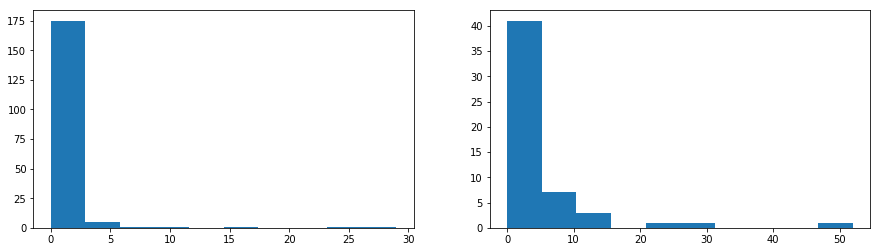

In [236]:
# print(len(rep_df[rep_df['twitter_handle'].isin(nra_endorsed) | rep_df['twitter_handle2'].isin(nra_endorsed)].gun_control_tweet_count))
# len(dem_df[dem_df['twitter_handle'].isin(gun_sense) | rep_df['twitter_handle2'].isin(gun_sense)].gun_control_tweet_count)

f, axs = plt.subplots(1,2,figsize=(15,4))
x = rep_df[(rep_df['twitter_handle'].isin(nra_endorsed)) & (rep_df['twitter_handle2'].isin(nra_endorsed))]
y = rep_df[(~rep_df['twitter_handle'].isin(nra_endorsed)) & (~rep_df['twitter_handle2'].isin(nra_endorsed))]
axs[0].hist(x[x['gun_control_tweet_count'] < 50].gun_control_tweet_count)
axs[1].hist(y.gun_control_tweet_count)
print(len(x))
print(len(y))
print(len(rep_df))



In [209]:
# dem_df[dem_df['gun_sense_candidate'] == 'Yes'].twitter_handle

5           WaltMaddox
10          ElectDrDia
11     ItsMalloryHagan
12        LeeAuman2018
16        clarketucker
17           GwenCombs
26       DelaineEastin
27         GavinNewsom
28        JohnChiangCA
39       joshua_harder
43           VMforCA10
51        BryanCaforio
52     jessphoenix2018
53        RepKatieHill
55      AndyThorburnCA
56       GilCisnerosCA
58         DocTran2018
59           samjammal
61       Morse4America
62      regina_bateson
64        rozacalderon
65        peacock4ca42
67          BrianForde
68           DaveMinCA
69       katieporteroc
70       KiaHamadanchy
72     drhanskeirstead
73         HarleyRouda
76     OmarInTheHouse_
89          Kennedy4CO
            ...       
620    Barlow4Congress
623              Kanew
631       randrewwhite
644     SiegelForTexas
646    Cadien4Congress
666       JosephKopser
667      mstreetwilson
671       SriPKulkarni
674     GinaOrtizJones
678     JanMcDowellDEM
683       ChrisPerriTX
684       JulieForTX25
700       v